<a href="https://colab.research.google.com/github/Zhang-Cheng-76200/Random-Walk-Prediction/blob/main/Random_walk_prediction_BTC_PLOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount ('gdrive')

Mounted at gdrive


In [3]:
# Define the paths to your CSV files
predictions_file_path = '/content/gdrive/MyDrive/Random_walk_prediction/files/all_predictions.csv'
performance_metrics_file_path = '/content/gdrive/MyDrive/Random_walk_prediction/files/performance_metrics.csv'

In [4]:
# Load the CSV files into DataFrames
df_predictions = pd.read_csv(predictions_file_path)
df_performance = pd.read_csv(performance_metrics_file_path)

# Display the loaded data to ensure correctness
print("Predictions Data:")
print(df_predictions.head())
print("\nPerformance Metrics Data:")
print(df_performance)

Predictions Data:
    Raw_Y_Test      Y_Fusion   Naive_Test  ARIMA_Predictions  LR_Predictions  \
0  25576.39453  25154.521415  25124.67578       25165.687271    25005.316111   
1  26327.46289  25606.240165  25576.39453       25553.009297    25441.507109   
2  26510.67578  26357.308525  26327.46289       26288.668419    26197.069863   
3  26336.21289  26540.521415  26510.67578       26501.224588    26340.532736   
4  26851.02930  26366.058525  26336.21289       26345.212706    26155.821513   

   MLP_Predictions  LSTM_Predictions  
0     25190.736328      25118.212891  
1     25764.724609      25467.943359  
2     26489.519531      26204.326172  
3     26634.406250      26439.755859  
4     26408.048828      26292.919922  

Performance Metrics Data:
   Models         MAE            MSE
0  Fusion  431.940881  449611.828348
1   naive  433.766817  456875.143422
2   ARIMA  431.050006  456466.453451
3      LR  463.574310  486329.417207
4     MLP  496.776367  486248.250000
5    LSTM  457.213

In [5]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

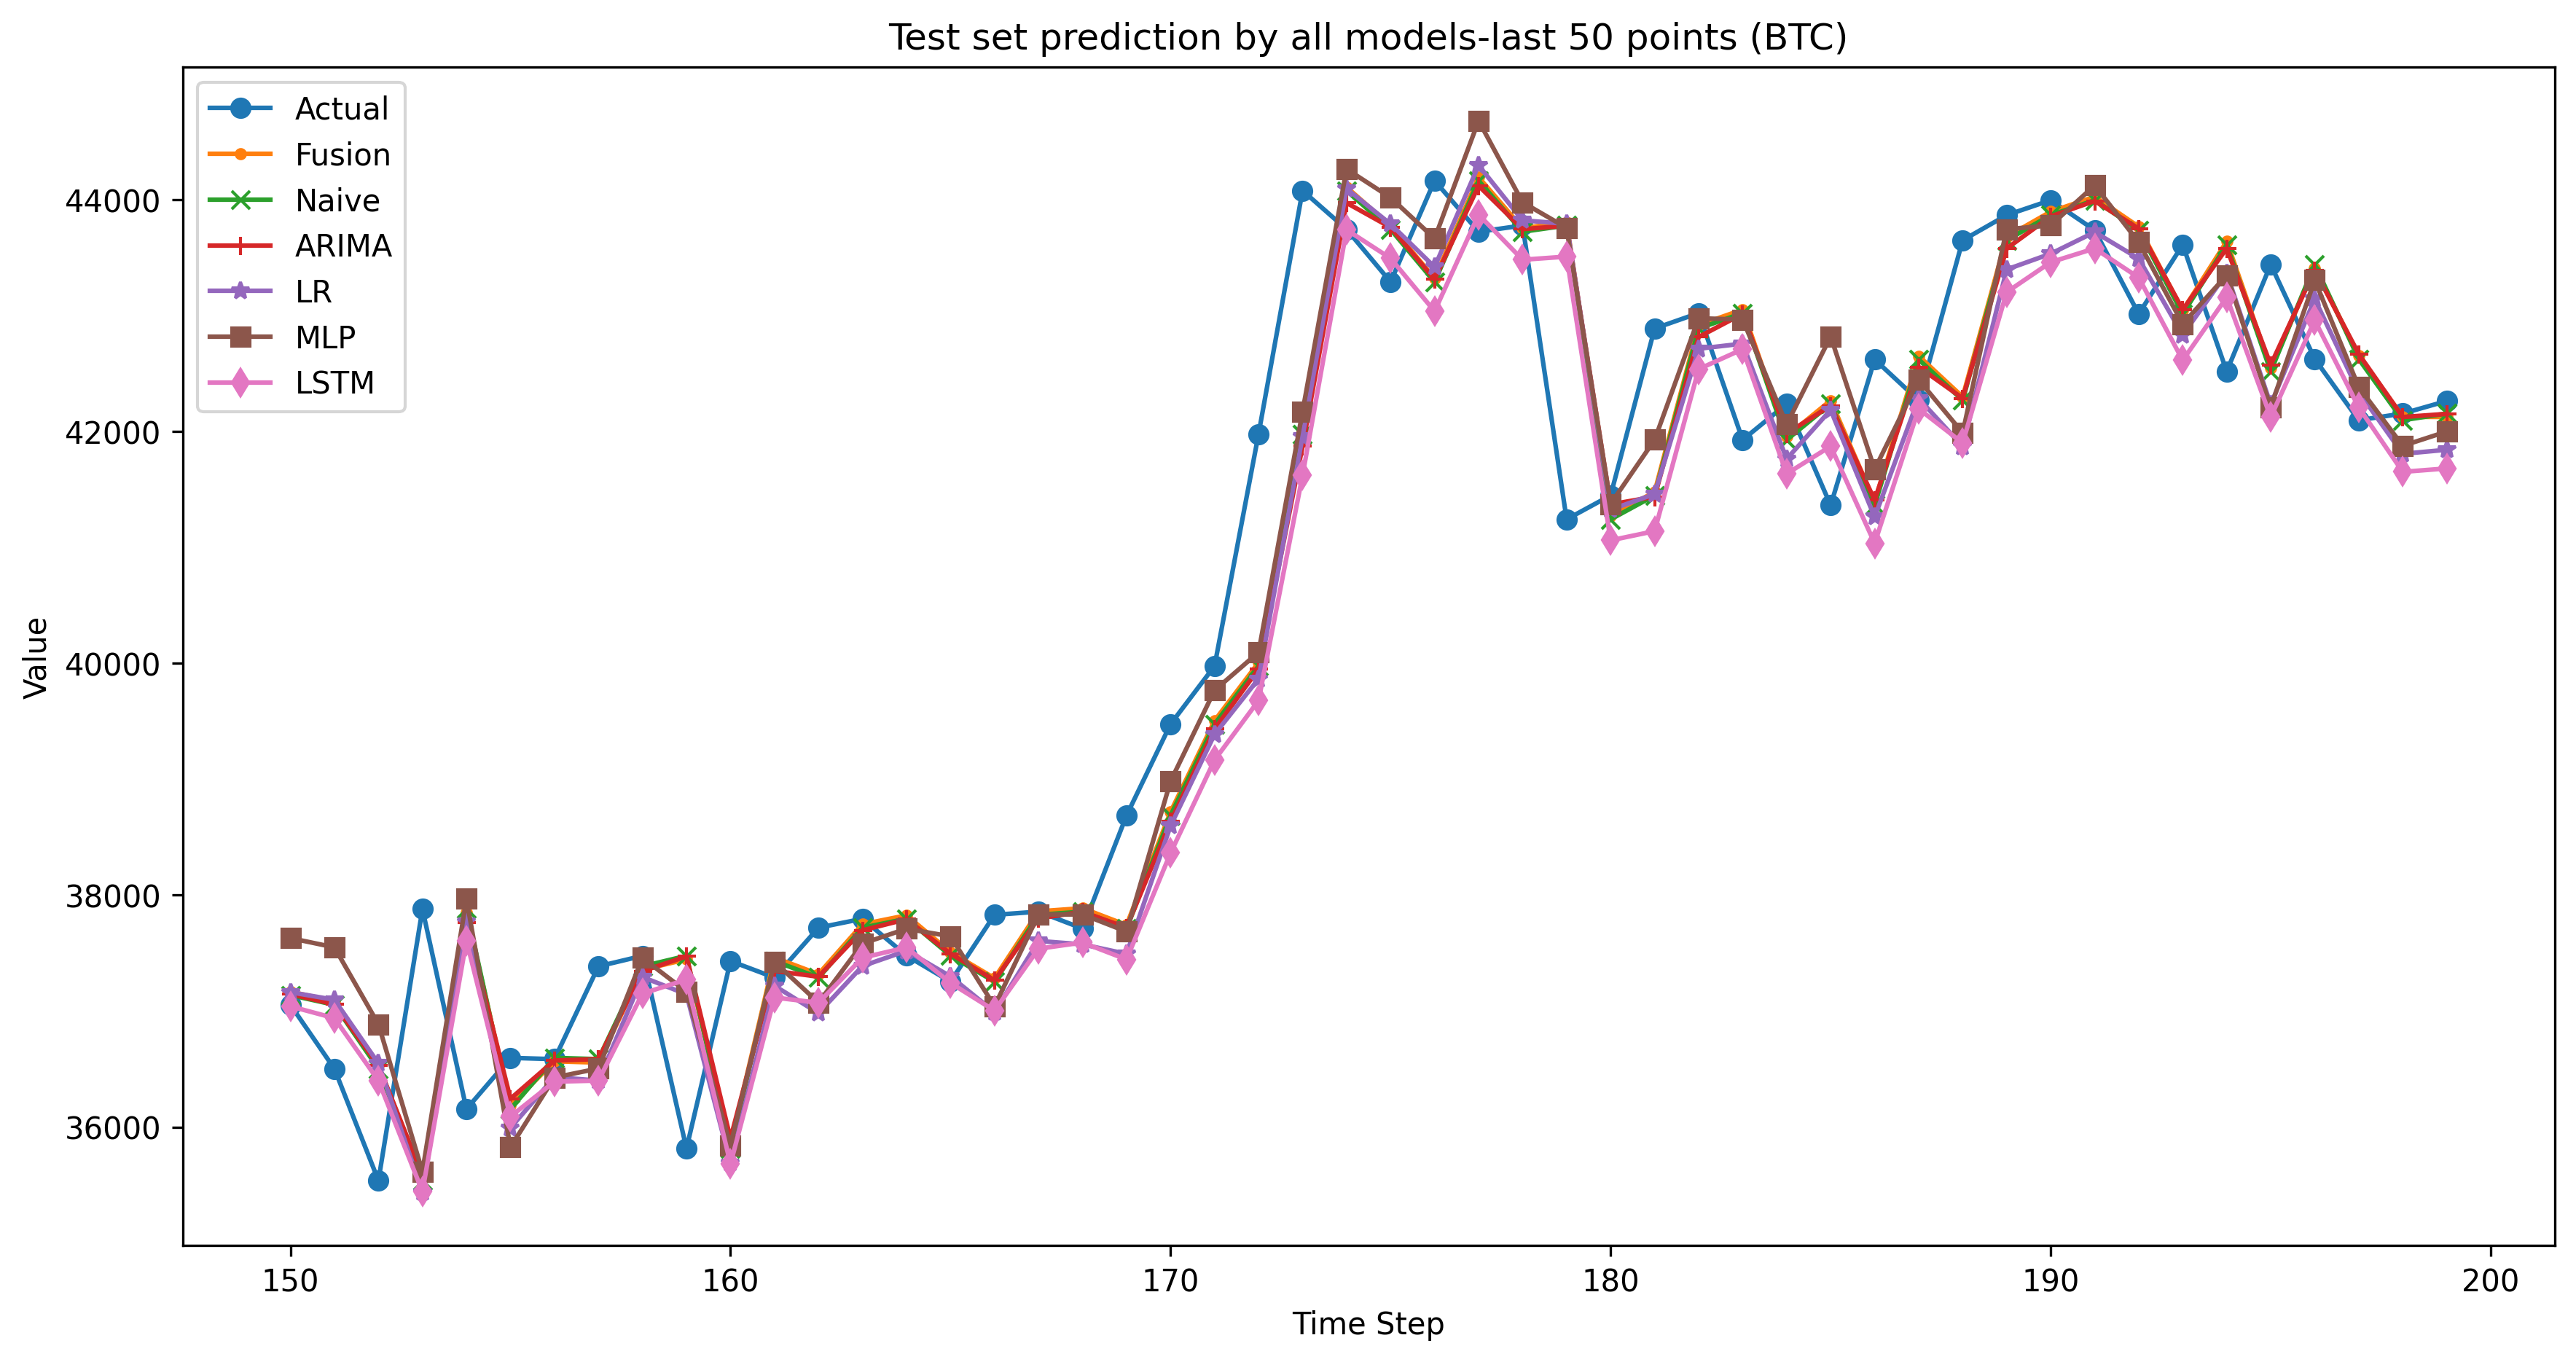

In [6]:
last_50_index = df_predictions.index[-50:]  # Get the index for the last 50 points

plt.figure(figsize=(14, 7), dpi = 300)
plt.plot(last_50_index, df_predictions['Raw_Y_Test'][-50:], label='Actual', marker='o')
plt.plot(last_50_index, df_predictions['Y_Fusion'][-50:], label='Fusion', marker='.')
plt.plot(last_50_index, df_predictions['Naive_Test'][-50:], label='Naive', marker='x')
plt.plot(last_50_index, df_predictions['ARIMA_Predictions'][-50:], label='ARIMA', marker='+')
plt.plot(last_50_index, df_predictions['LR_Predictions'][-50:], label='LR', marker='*')
plt.plot(last_50_index, df_predictions['MLP_Predictions'][-50:], label='MLP', marker='s')
plt.plot(last_50_index, df_predictions['LSTM_Predictions'][-50:], label='LSTM', marker='d')

plt.title('Test set prediction by all models-last 50 points (BTC)')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.savefig("/content/gdrive/MyDrive/Random_walk_prediction/figures/ALL_MODELS_BTC.tif")
plt.show()

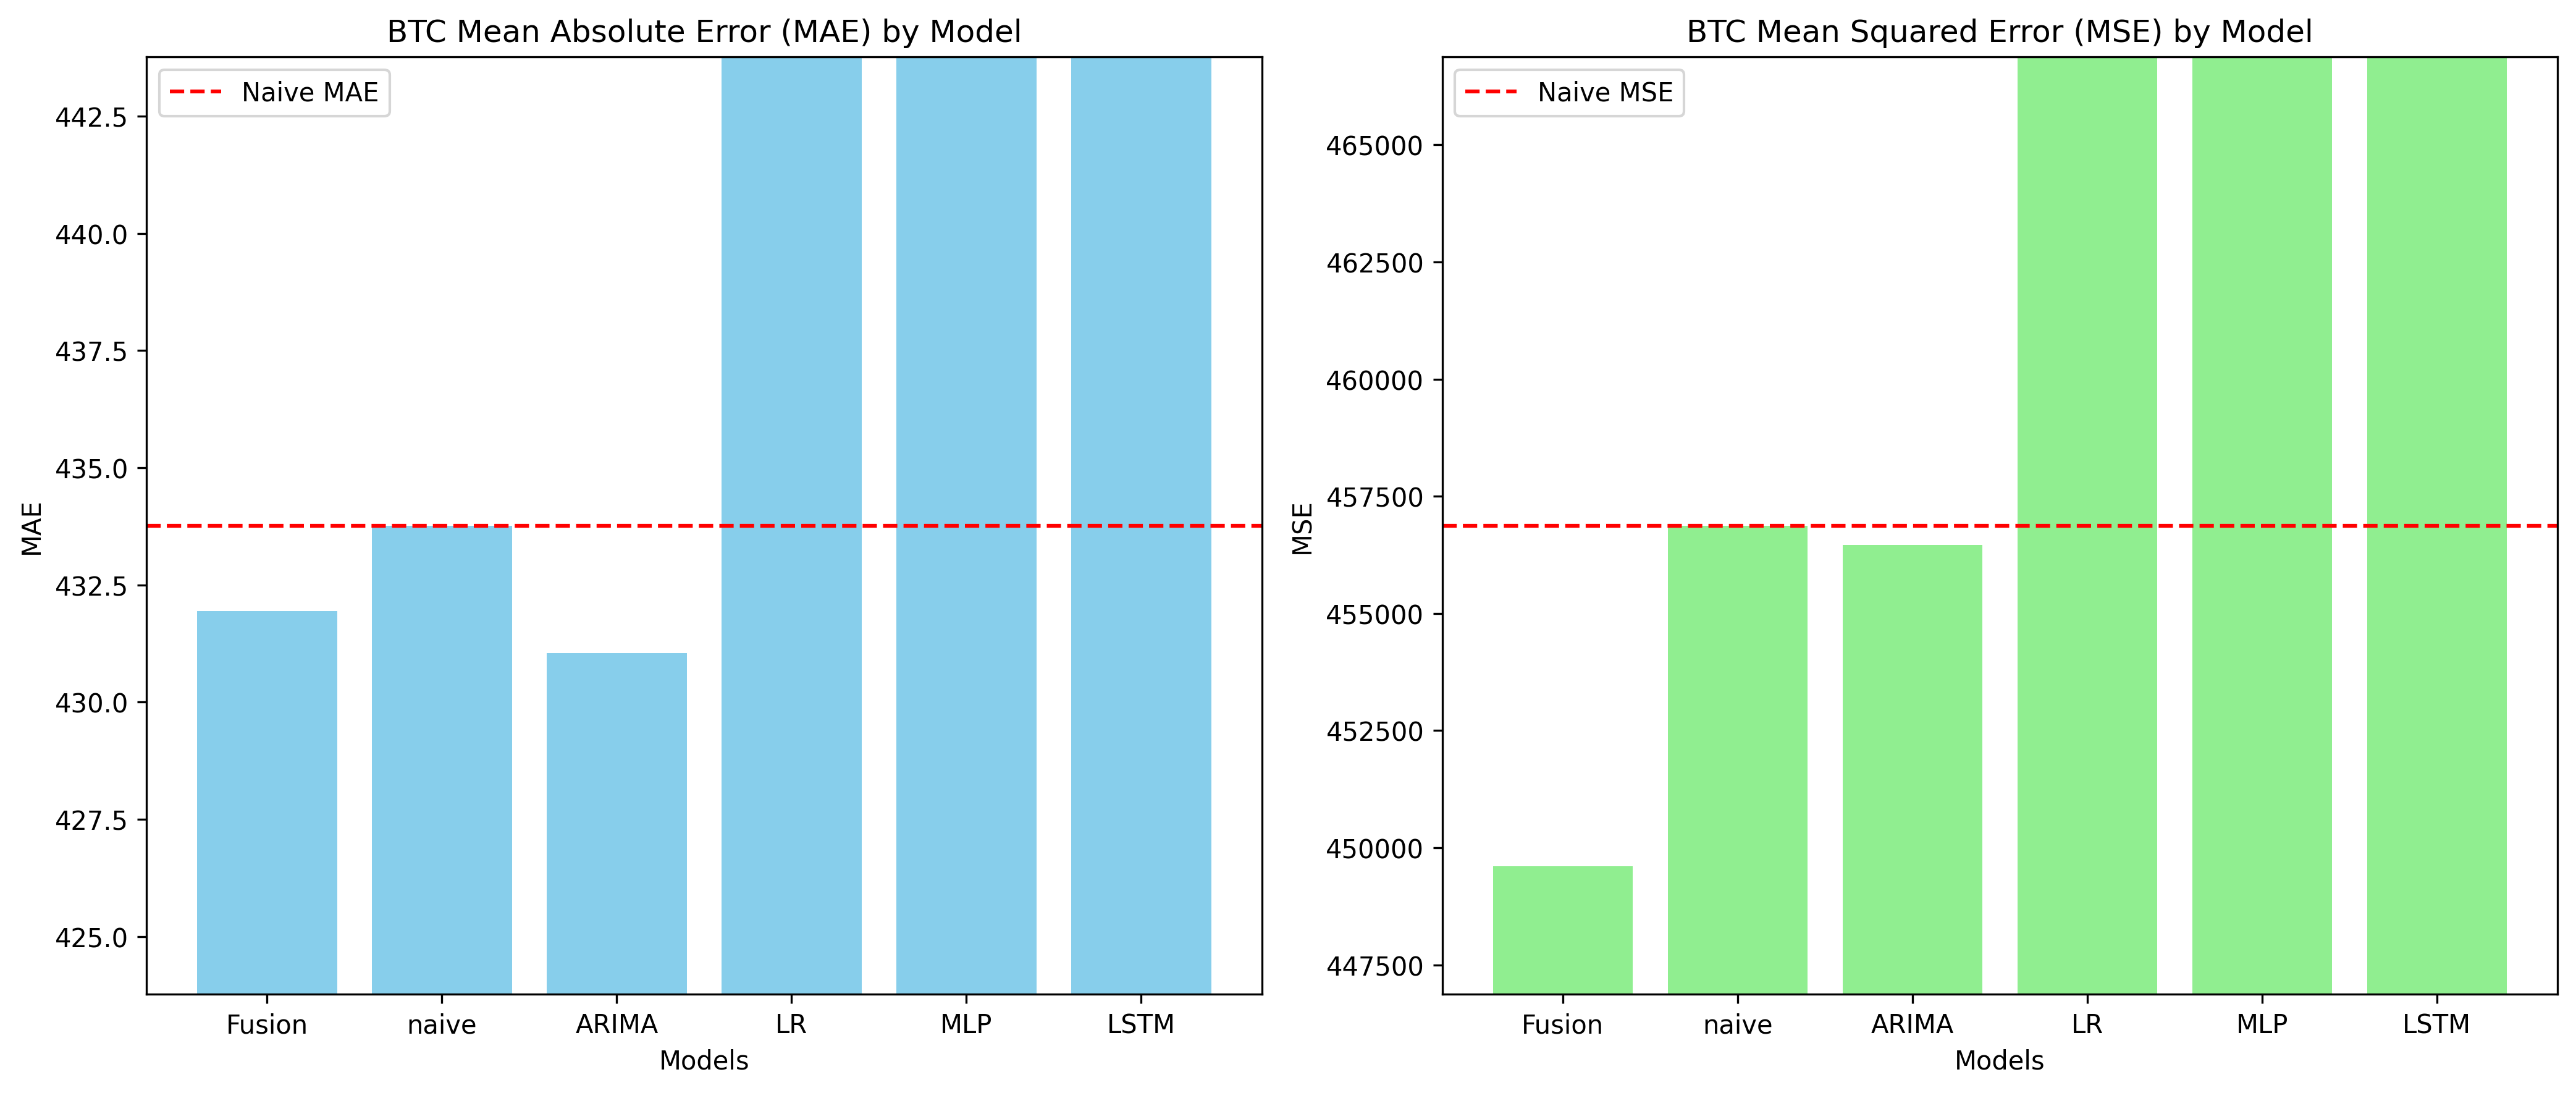

In [10]:
# Calculate limits around the naive forecast for zooming
naive_mae = df_performance['MAE'][df_performance['Models'] == 'naive'].values[0]
mae_margin = 10  # Define a margin for the MAE plot

naive_mse = df_performance['MSE'][df_performance['Models'] == 'naive'].values[0]
mse_margin = 10000  # Define a margin for the MSE plot

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6),dpi = 300)

# Bar chart for MAE
ax[0].bar(df_performance['Models'], df_performance['MAE'], color='skyblue')
ax[0].axhline(y=naive_mae, color='r', linestyle='--', label='Naive MAE')
ax[0].set_title('BTC Mean Absolute Error (MAE) by Model')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('MAE')
ax[0].set_ylim([naive_mae - mae_margin, naive_mae + mae_margin])  # Set y-limits around the naive MAE
ax[0].legend()

# Bar chart for MSE
ax[1].bar(df_performance['Models'], df_performance['MSE'], color='lightgreen')
ax[1].axhline(y=naive_mse, color='r', linestyle='--', label='Naive MSE')
ax[1].set_title('BTC Mean Squared Error (MSE) by Model')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('MSE')
ax[1].set_ylim([naive_mse - mse_margin, naive_mse + mse_margin])  # Set y-limits around the naive MSE
ax[1].legend()

plt.tight_layout()
plt.savefig("/content/gdrive/MyDrive/Random_walk_prediction/figures/ALL_MODELS_Comparison_BTC.tif")
plt.show()